## KNN
*** Date : 2019-3-11 ***

*** Author : wwt117@163.com ***

*** Source : 《 Machine Learning in Action 》(chapter 2)  -- Peter Harrington***

#### KNN特点
- 优点：精度高、对异常值不敏感、无数据输入假定
- 缺点：计算复杂度高，空间复杂度高

#### 1、一个简单例子


In [13]:
import numpy as np
import operator

def create_dataset():
    """创建简单数据集
    
    输出参数：
    - - - - - -
    data:
        样本数据
    label:
        样本标签
    """
    data = np.array([[1,101],[5,89],[108,5],[115,8]])
    label = ['A','A','B','B']
    return data,label

def classify(test,data,label,K):
    """KNN分类
    
    输入参数：
    - - - - - -
    test:
        待分类数据
    data:
        训练数据
    label:
        训练数据标签
    K:
        选择最近的K个点
        
    输出参数：
    - - - - - - 
    test_label:
        预测标签
    """
    # 欧式距离
    te = (data - test)**2
    dist = np.sqrt(te.sum(axis=1))
    
    # dist从大到小排序后的索引值
    index = dist.argsort()
    
    # 统计dist中距离最近的K个数据的标签的类型
    count = {}
    for i in range(K):
        clabel = label[index[i]]
        count[clabel] = count.get(clabel,0) + 1
    
    # 字典降序排序
    sorted_count = sorted(count.items(),key=operator.itemgetter(1),reverse=True)
    
    # 返回出现次数最多的类
    return sorted_count[0][0]


if __name__=='__main__':
    # 创建数据集
    data,label = create_dataset()
    
    # 测试集
    test = [101,20]
    
    # 预测
    test_label = classify(test,data,label,3)
    
    # 输出预测结果
    print("测试数据的类别为: %s" % test_label)

测试数据的类别为: B


#### 2、约会网站配对效果判定

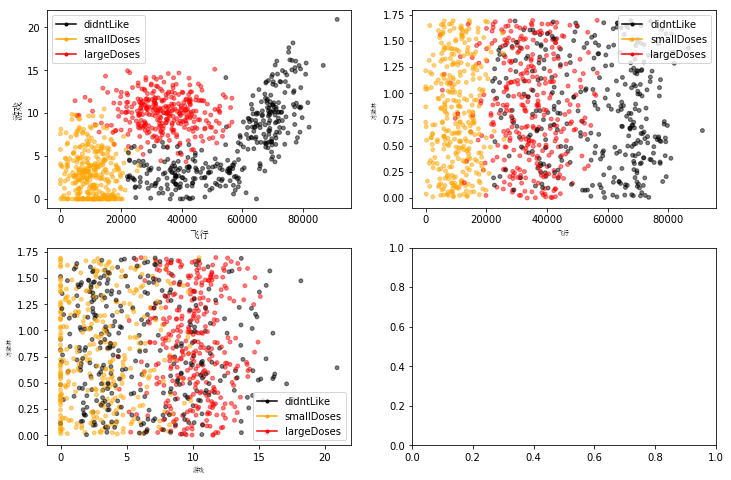

分类错误率：0.400000%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import operator

def file2matrix(filename):
    """读入文件数据，转化为numpy
    
    输入参数：
    - - - - - -
    filename:
        文件名称（路径）
        
    输出参数：
    - - - - - -
    data: 
        数据
    labe:
        标签
    """
    # 打开文件
    fr = open(filename)
    # 读取文件内容
    data = []
    label = []
    for line in fr.readlines():

        line_list = line.strip().split()

        # 前三列存入数据
        data.append([float(line_list[0]),float(line_list[1]),float(line_list[2])])

        # 根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if line_list[-1] == 'didntLike':
            label.append(1)
        elif line_list[-1] == 'smallDoses':
            label.append(2)
        elif line_list[-1] == 'largeDoses':
            label.append(3)
    
    return np.array(data),np.array(label)

def visualize(data,label):
    """数据可视化
    
    输入参数：
    - - - - - -
    data:
        样本数据
    label:
        样本标签
    
    """
    # 将画布分为2*2的区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(12,8))

    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)
    
    num = len(label)
    color = []
    for i in label:
        if i == 1:
            color.append("black")
        elif i == 2:
            color.append("orange")
        elif i ==3:
            color.append("red")
    
    # 绘制散点图
    # 图1：X--飞行  Y--游戏
    axs[0][0].scatter(x=data[:,0],y=data[:,1],color=color,s=15, alpha=0.5)
    #设置标题,x轴label,y轴label
    axs0_xlabel_text = axs[0][0].set_xlabel(u'飞行')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'游戏')
    plt.setp(axs0_xlabel_text, size=6, weight='bold', color='black',FontProperties=font) 
    plt.setp(axs0_ylabel_text, size=6, weight='bold', color='black',FontProperties=font)

    
    # 图2：X--飞行  Y--冰淇淋
    axs[0][1].scatter(x=data[:,0],y=data[:,2],color=color,s=15, alpha=0.5)
    #设置标题,x轴label,y轴label
    axs1_xlabel_text = axs[0][1].set_xlabel(u'飞行',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'冰激淋',FontProperties=font)
    plt.setp(axs1_xlabel_text, size=6, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=6, weight='bold', color='black')

    
    # 图3：X--游戏  Y--冰淇淋
    axs[1][0].scatter(x=data[:,1],y=data[:,2],color=color,s=15, alpha=0.5)
    #设置标题,x轴label,y轴label
    axs2_xlabel_text = axs[1][0].set_xlabel(u'游戏',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'冰激淋',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=6, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=6, weight='bold', color='black')

    
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',markersize=6, label='largeDoses')
    
    # 添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    
    # 显示图片
    plt.show()

    
def autonorm(data):
    """特征值归一化
    
    归一化方法：
    - - - - - - 
        newvalue = (oldvalue - min) / (max - min)
    
    输入参数：
    - - - - - -
    data:
        样本数据
        
    输出参数
    - - - - - - 
    ndata:
        归一化后样本数据
    """
    # 获得最大最小值
    minval = data.min(0)
    maxval = data.max(0)
    
    # 归一化
    ndata = (data - minval) / (maxval - minval)
    
    return ndata
    
    
def classify(test,data,label,K):
    """KNN分类
    
    输入参数：
    - - - - - -
    test:
        待分类数据
    data:
        训练数据
    label:
        训练数据标签
    K:
        选择最近的K个点
        
    输出参数：
    - - - - - - 
    test_label:
        预测标签
    """
    # 欧式距离
    te = (data - test)**2
    dist = np.sqrt(te.sum(axis=1))
    
    # dist从大到小排序后的索引值
    index = dist.argsort()
    
    # 统计dist中距离最近的K个数据的标签的类型
    count = {}
    for i in range(K):
        clabel = label[index[i]]
        count[clabel] = count.get(clabel,0) + 1
    
    # 字典降序排序
    sorted_count = sorted(count.items(),key=operator.itemgetter(1),reverse=True)
    
    # 返回出现次数最多的类
    return sorted_count[0][0]    
    
    
    
    
if __name__=='__main__':
    
    # 读入文件数据
    data,label = file2matrix("datingTestSet.txt")
    
    # 显示数据分布
    visualize(data,label)
    
    # 样本数据归一化
    ndata = autonorm(data)
    
    # 取10%的数据作为测试集
    ratio = 0.1
    
    # 样本数量
    num = ndata.shape[0]
    
    # 测试集数量
    num_test = int(num * ratio)
    
    # 错误统计
    err_count = 0
    
    for i in range(num_test):
        result = classify(ndata[i],ndata[num_test:num,:],label[num_test:num],4)
        if result != label[i]:
            err_count += 1
    print("分类错误率：%f%%" % (err_count / float(num)*100))                                                              

#### 3、手写数字识别

In [19]:
import numpy as np
import os
import operator



def img2vector(filename):
    """将txt中二维图片数据转换成一维向量
    
    输入参数：
    - - - - - -
    filename:
        文件名（路径）
        
    输出参数：
    - - - - - -
    data:
        样本数据（一维）
    
    """
    data = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            data[0,32*i+j] = int(line[j])
    return data


def classify(test,data,label,K):
    """KNN分类
    
    输入参数：
    - - - - - -
    test:
        待分类数据
    data:
        训练数据
    label:
        训练数据标签
    K:
        选择最近的K个点
        
    输出参数：
    - - - - - - 
    test_label:
        预测标签
    """
    # 欧式距离
    te = (data - test)**2
    dist = np.sqrt(te.sum(axis=1))
    
    # dist从大到小排序后的索引值
    index = dist.argsort()
    
    # 统计dist中距离最近的K个数据的标签的类型
    count = {}
    for i in range(K):
        clabel = label[index[i]]
        count[clabel] = count.get(clabel,0) + 1
    
    # 字典降序排序
    sorted_count = sorted(count.items(),key=operator.itemgetter(1),reverse=True)
    
    # 返回出现次数最多的类
    return sorted_count[0][0]    


def handwriting_classify():
    """手写数字识别
    
    """
    
    label = []
    
    # 获取训练集文件列表
    training_list = os.listdir('digits/trainingDigits')
    
    # 获得训练集样本数量
    m = len(training_list)
    
    data = np.zeros((m,1024))
    
    # 根据文件名，解析出对应数字存入label，txt中数字拉成一维存入data
    for i in range(m):
        filename = training_list[i]
        filestr = filename.split('.')[0]
        class_str  = int(filestr.split('_')[0])
        label.append(class_str)
        data[i,:] = img2vector("digits/trainingDigits/%s" % filename)
        
    # 获取测试集文件列表
    testing_list = os.listdir('digits/testDigits')
    
    # 错误统计
    err_count = 0
    
    # 获得测试集样本数量
    m_test = len(testing_list)
    
    # 测试集分类
    for i in range(m_test):
        filename = testing_list[i]
        filestr = filename.split('.')[0]
        class_str  = int(filestr.split('_')[0])
        test_data = img2vector('digits/testDigits/%s' % filename)
        result = classify(test_data,data,label,3)
        
        if result != class_str:
            err_count += 1
    print("分类错误率：%f%%" % (err_count / float(m_test)*100)) 
    
    
        
if __name__=='__main__':
    
    handwriting_classify()


分类错误率：1.057082%
